<a href="https://colab.research.google.com/github/Meghana130613/Karnataka-Crop-yield-prediction-using-Machine-Learning/blob/main/Karnataka_Crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Karnataka Crop Yield Analysis**



In [ ]:
!pip install pygwalker -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 24.0 MB/s eta 0:00:00


In [ ]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pygwalker as pyg

##**Load data**

In [ ]:
from google.colab import files
f = files.upload()

Saving Crop Yield Karnataka.csv to Crop Yield Karnataka.csv


In [ ]:
crop_data=pd.read_csv("Crop Yield Karnataka.csv")
crop_data

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Karnataka,93100,133342,1266.7,8860327.00,28861.00,1.293571
1,Arhar/Tur,1997,Kharif,Karnataka,421810,98473,1266.7,40143657.70,130761.10,0.268235
2,Bajra,1997,Kharif,Karnataka,301149,132056,1266.7,28660350.33,93356.19,0.404545
3,Bajra,1997,Summer,Karnataka,820,662,1266.7,78039.40,254.20,0.810000
4,Black pepper,1997,Kharif,Karnataka,3825,924,1266.7,364025.25,1185.75,0.437500
...,...,...,...,...,...,...,...,...,...,...
1427,Tobacco,2002,Whole Year,Karnataka,82350,59227,860.8,7796074.50,20587.50,0.678750
1428,Turmeric,2002,Whole Year,Karnataka,6596,28603,860.8,624443.32,1649.00,4.049524
1429,Urad,2002,Kharif,Karnataka,149369,21266,860.8,14140763.23,37342.25,0.139000
1430,Urad,2002,Rabi,Karnataka,16084,1895,860.8,1522672.28,4021.00,0.118571


In [ ]:
pyg.walk(crop_data)

Box(children=(HTML(value='\n<div id="ifr-pyg-00062ac6c11a7b79OYpED9N4rZKFIdaq" style="height: auto">\n    <hea…

## **Exploratory Data Analysis and Data Pre-processing**

In [ ]:
crop_data.shape


(1432, 10)

In [ ]:
crop_data.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [ ]:
crop_data.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,1432.000000,1.432000e+03,1.432000e+03,1432.00000,1.432000e+03,1432.000000,1432.000000
mean,2008.776536,1.801029e+05,4.453408e+07,1181.83850,2.414821e+07,48305.248547,105.720578
std,6.422711,2.898215e+05,3.803758e+08,152.04667,4.011689e+07,83128.317533,858.512863
min,1997.000000,9.000000e+00,0.000000e+00,860.80000,1.416960e+03,3.420000,0.000000
25%,2003.000000,7.328500e+03,8.678000e+03,1111.70000,9.897465e+05,1959.835000,0.491862
50%,2009.000000,4.591400e+04,5.475450e+04,1203.80000,5.824762e+06,11594.000000,1.011905
75%,2014.000000,2.086508e+05,2.411325e+05,1316.20000,2.777394e+07,55392.090000,2.745544
max,2019.000000,1.626389e+06,5.030774e+09,1422.30000,2.793486e+08,601763.930000,9984.488333


In [ ]:
print(crop_data['Crop'].unique())

['Arecanut' 'Arhar/Tur' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander'
 'Dry chillies' 'Garlic' 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Maize'
 'Ragi' 'Rice' 'Sugarcane' 'Turmeric' 'Wheat' 'Castor seed' 'Coconut '
 'Cotton(lint)' 'Gram' 'Linseed' 'Moong(Green Gram)' 'Niger seed' 'Onion'
 'Peas & beans (Pulses)' 'Potato' 'Rapeseed &Mustard' 'Safflower'
 'Sesamum' 'Soyabean' 'Sunflower' 'Banana' 'Mesta' 'Other  Rabi pulses'
 'Other Kharif pulses' 'Sannhamp' 'Small millets' 'Sweet potato' 'Tapioca'
 'Tobacco' 'Urad' 'Cashewnut' 'Cowpea(Lobia)']


In [ ]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             1432 non-null   object 
 1   Crop_Year        1432 non-null   int64  
 2   Season           1432 non-null   object 
 3   State            1432 non-null   object 
 4   Area             1432 non-null   int64  
 5   Production       1432 non-null   int64  
 6   Annual_Rainfall  1432 non-null   float64
 7   Fertilizer       1432 non-null   float64
 8   Pesticide        1432 non-null   float64
 9   Yield            1432 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 112.0+ KB


In [ ]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [ ]:
# Dropping missing values
crop_data = crop_data.dropna()
crop_data

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Karnataka,93100,133342,1266.7,8860327.00,28861.00,1.293571
1,Arhar/Tur,1997,Kharif,Karnataka,421810,98473,1266.7,40143657.70,130761.10,0.268235
2,Bajra,1997,Kharif,Karnataka,301149,132056,1266.7,28660350.33,93356.19,0.404545
3,Bajra,1997,Summer,Karnataka,820,662,1266.7,78039.40,254.20,0.810000
4,Black pepper,1997,Kharif,Karnataka,3825,924,1266.7,364025.25,1185.75,0.437500
...,...,...,...,...,...,...,...,...,...,...
1427,Tobacco,2002,Whole Year,Karnataka,82350,59227,860.8,7796074.50,20587.50,0.678750
1428,Turmeric,2002,Whole Year,Karnataka,6596,28603,860.8,624443.32,1649.00,4.049524
1429,Urad,2002,Kharif,Karnataka,149369,21266,860.8,14140763.23,37342.25,0.139000
1430,Urad,2002,Rabi,Karnataka,16084,1895,860.8,1522672.28,4021.00,0.118571


In [ ]:
#checking for null values
crop_data.isnull().values.any()

False

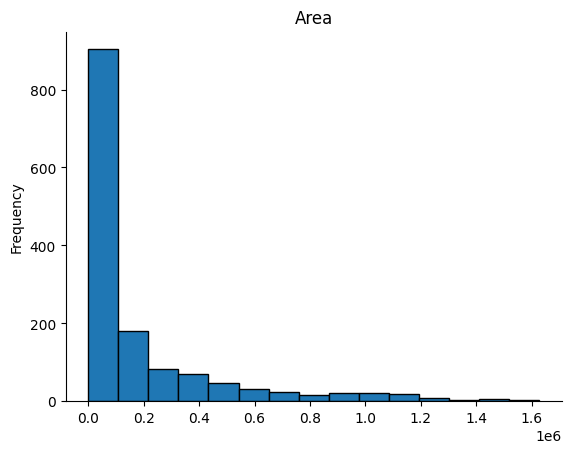

In [ ]:
crop_data['Area'].plot(kind='hist', bins=15, title='Area',edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

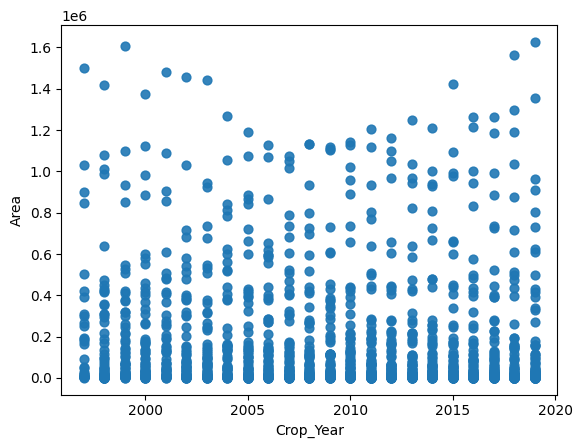

In [ ]:
crop_data.plot(kind='scatter', x='Crop_Year', y='Area', s=40, alpha=.9)
plt.gca().set_visible(True)

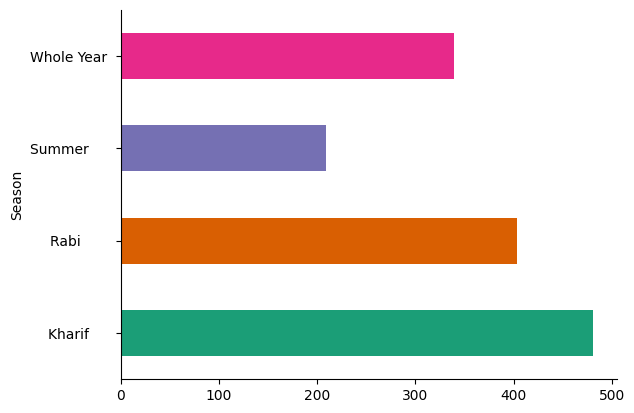

In [ ]:
crop_data.groupby('Season').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

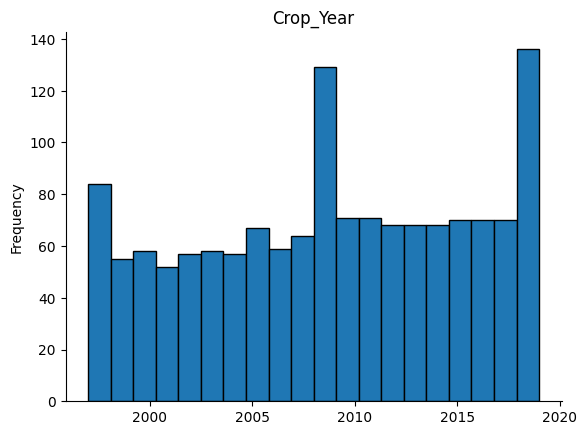

In [ ]:
crop_data['Crop_Year'].plot(kind='hist', bins=20, title='Crop_Year',edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

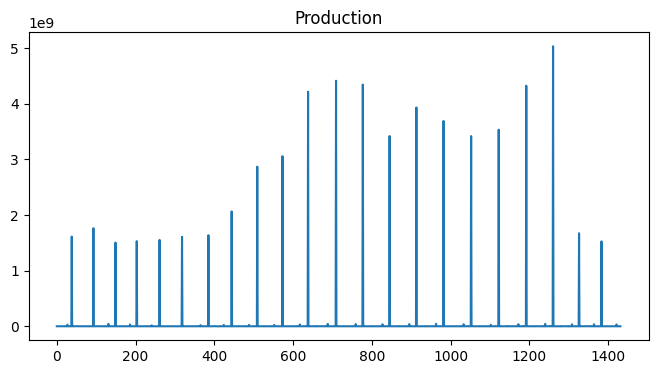

In [ ]:
crop_data['Production'].plot(kind='line', figsize=(8, 4), title='Production')
plt.gca().spines[['top','right']].set_visible(True)

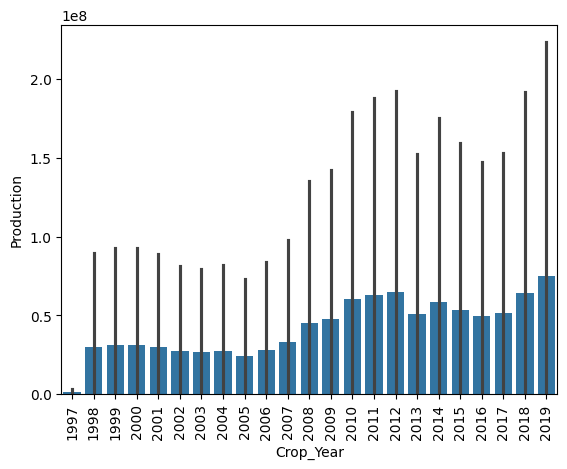

In [ ]:
sns.barplot(x = "Crop_Year", y = "Production", data = crop_data)
plt.xticks(rotation = 90)
plt.show()

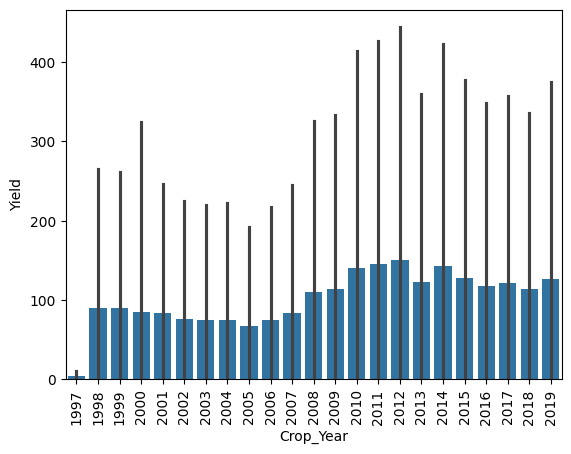

In [ ]:
sns.barplot(x = "Crop_Year", y = "Yield", data = crop_data)
plt.xticks(rotation = 90)
plt.show()

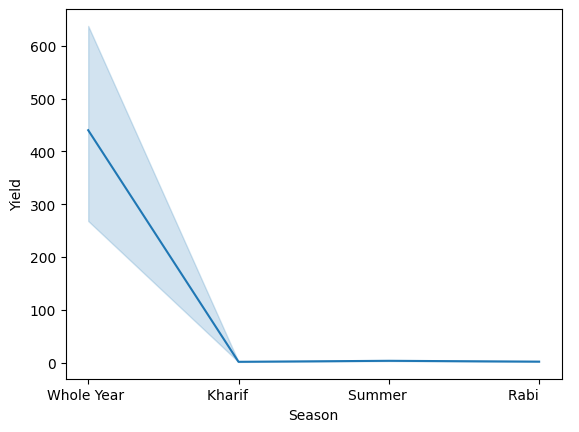

In [ ]:
sns.lineplot(x = "Season", y = "Yield", data = crop_data)
plt.show()

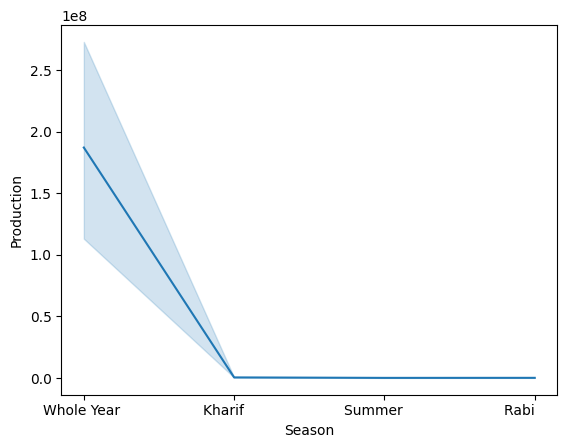

In [ ]:
sns.lineplot(x = "Season", y = "Production", data = crop_data)
plt.show()

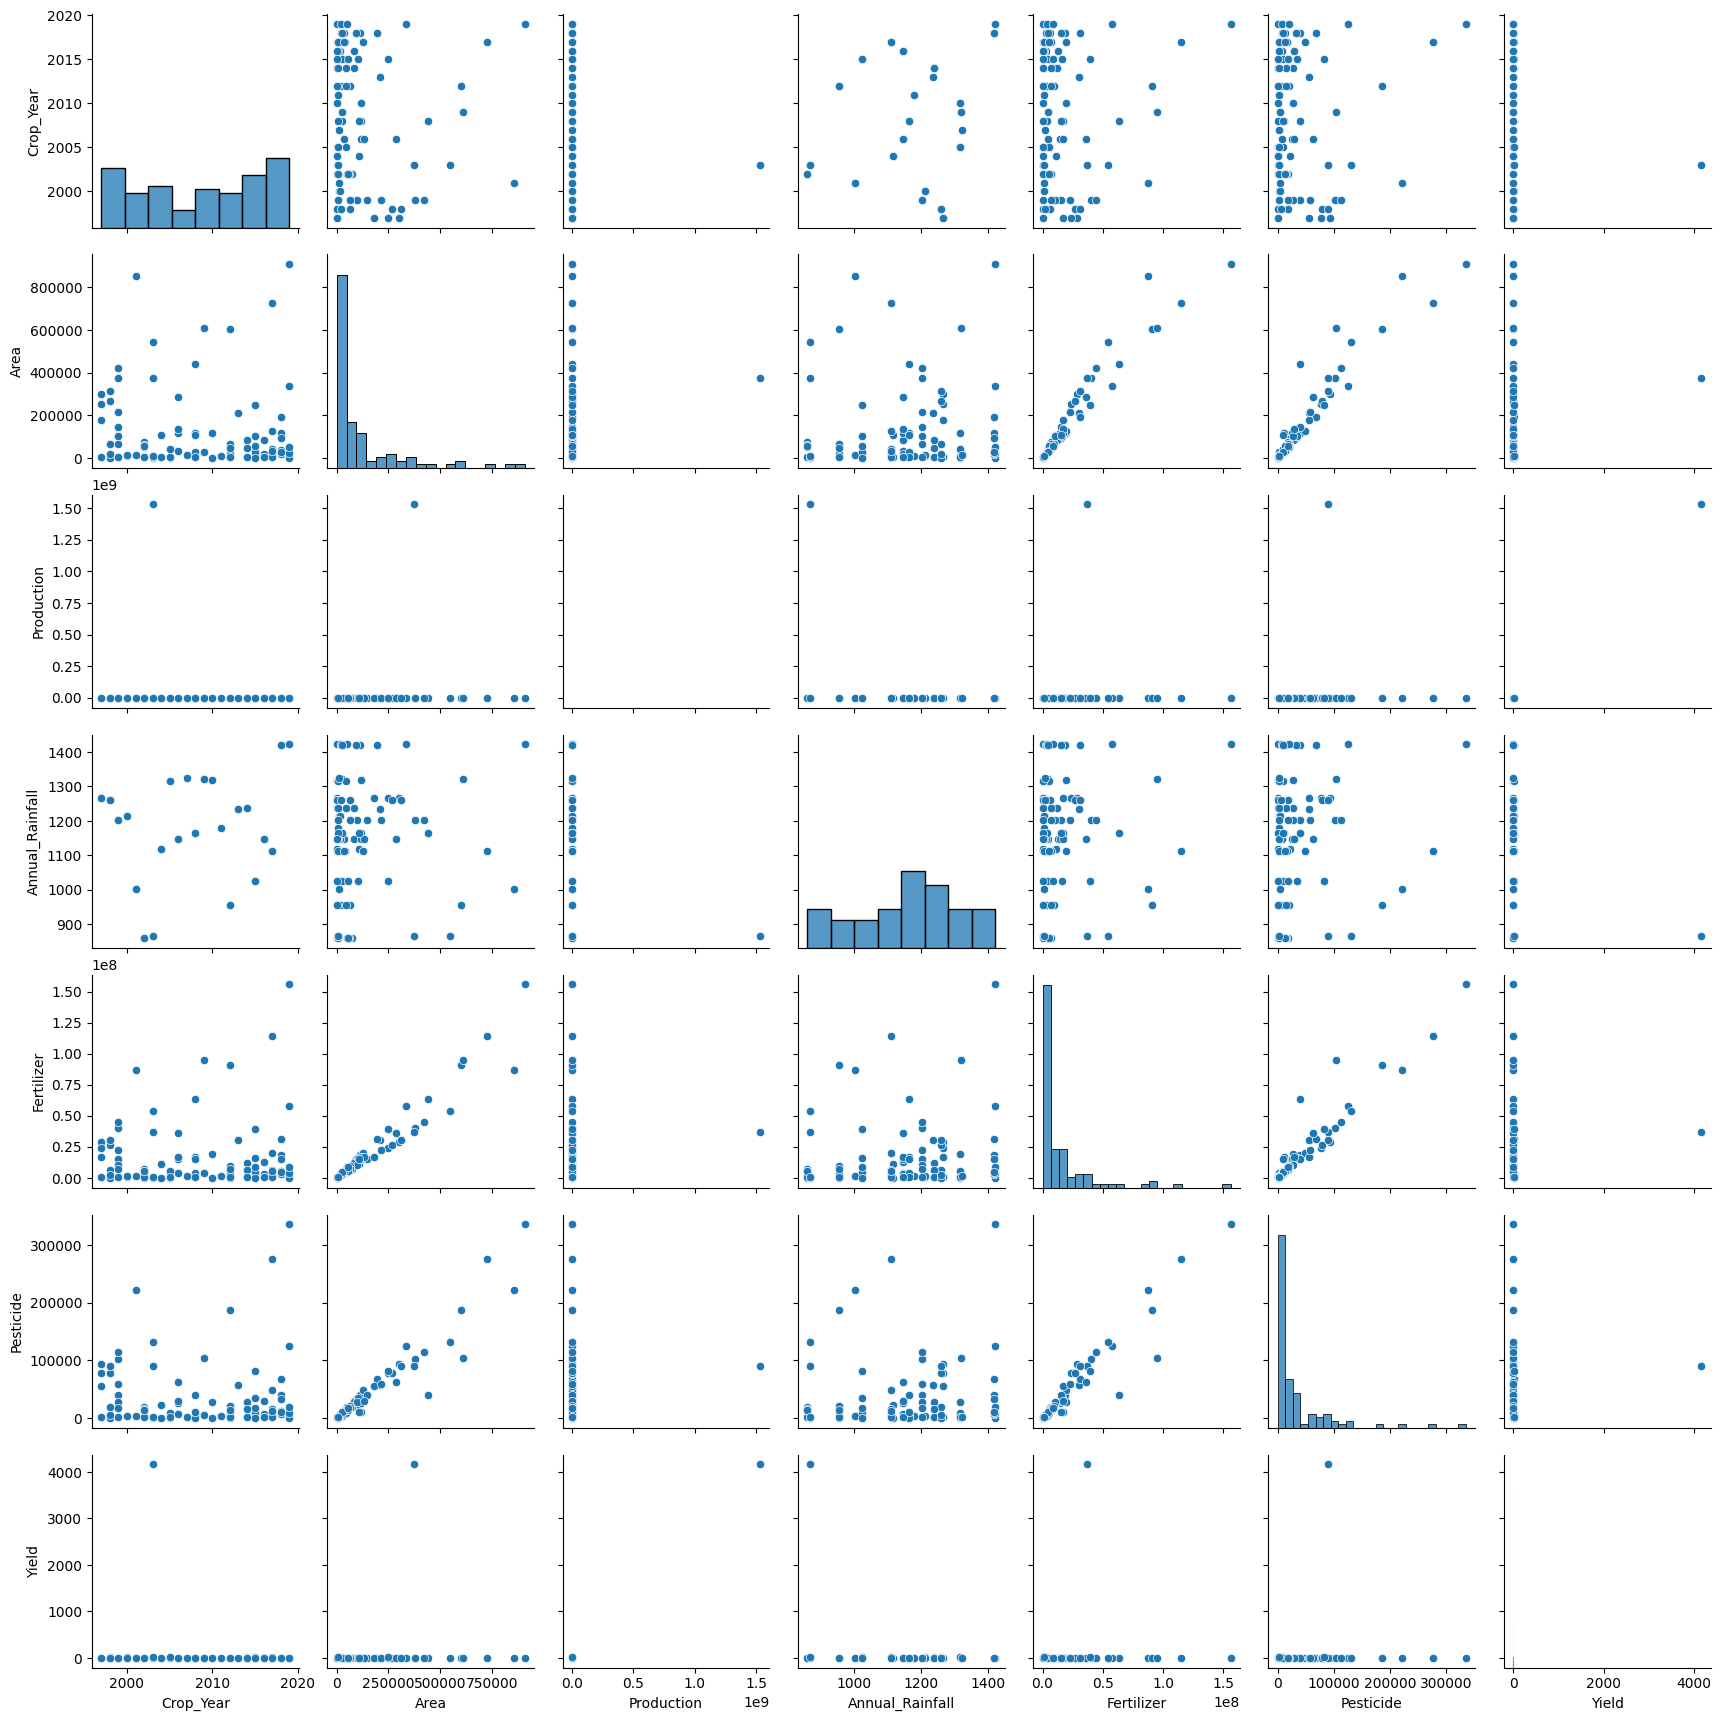

In [ ]:
# Visualizing the features
n_samples = 100
df_sample = crop_data.sample(n_samples,replace=False)
sns.pairplot(df_sample)

In [ ]:
#Dropping unnecessary columns

data = crop_data.drop(['State','Season','Crop'], axis = 1)

In [ ]:
data.corr()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.000000,-0.055985,0.036938,0.258453,0.056719,0.023655,0.025718
Area,-0.055985,1.000000,0.107410,0.005425,0.973379,0.956011,0.104630
Production,0.036938,0.107410,1.000000,0.012003,0.122109,0.114411,0.990421
Annual_Rainfall,0.258453,0.005425,0.012003,1.000000,0.053713,0.009844,0.003194
Fertilizer,0.056719,0.973379,0.122109,0.053713,1.000000,0.954195,0.116227
Pesticide,0.023655,0.956011,0.114411,0.009844,0.954195,1.000000,0.108336
Yield,0.025718,0.104630,0.990421,0.003194,0.116227,0.108336,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

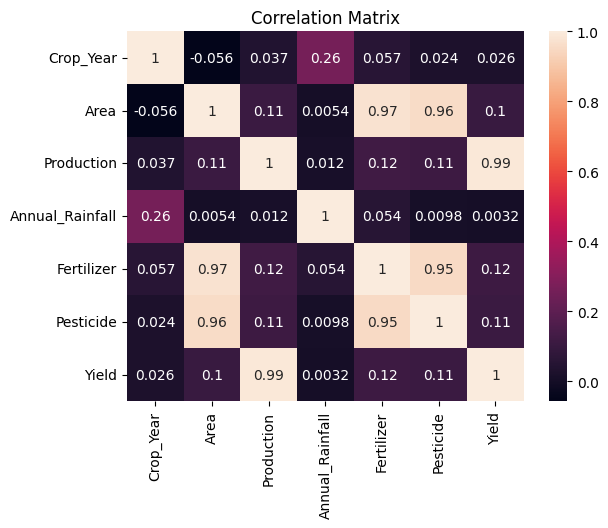

In [ ]:
sns.heatmap(data.corr(), annot =True)
plt.title('Correlation Matrix')

### **Data seperation as x and y**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import pandas as pd

yield_df_onehot = pd.get_dummies(crop_data, columns=['State','Season','Crop'], prefix = ['State',"Season","Crop"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'Yield']
label=crop_data['Yield']

In [ ]:
features.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,State_Karnataka,Season_Kharif,Season_Rabi,Season_Summer,...,Crop_Small millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat
0,1997,93100,133342,1266.7,8860327.00,28861.00,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1997,421810,98473,1266.7,40143657.70,130761.10,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1997,301149,132056,1266.7,28660350.33,93356.19,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1997,820,662,1266.7,78039.40,254.20,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1997,3825,924,1266.7,364025.25,1185.75,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
label.head()

,Yield
0,1.293571
1,0.268235
2,0.404545
3,0.810000
4,0.437500


In [ ]:
features = features.drop(['Crop_Year'], axis=1)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Area                        1432 non-null   int64  
 1   Production                  1432 non-null   int64  
 2   Annual_Rainfall             1432 non-null   float64
 3   Fertilizer                  1432 non-null   float64
 4   Pesticide                   1432 non-null   float64
 5   State_Karnataka             1432 non-null   bool   
 6   Season_Kharif               1432 non-null   bool   
 7   Season_Rabi                 1432 non-null   bool   
 8   Season_Summer               1432 non-null   bool   
 9   Season_Whole Year           1432 non-null   bool   
 10  Crop_Arecanut               1432 non-null   bool   
 11  Crop_Arhar/Tur              1432 non-null   bool   
 12  Crop_Bajra                  1432 non-null   bool   
 13  Crop_Banana                 1432 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

In [ ]:
features

array([[5.72381608e-02, 2.65052654e-05, 7.22885129e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.59349598e-01, 1.95741252e-05, 7.22885129e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.85159680e-01, 2.62496387e-05, 7.22885129e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.18358563e-02, 4.22718254e-06, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.88391397e-03, 3.76681600e-07, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.51776338e-01, 2.93688407e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
label

,Yield
0,1.293571
1,0.268235
2,0.404545
3,0.810000
4,0.437500
...,...
1427,0.678750
1428,4.049524
1429,0.139000
1430,0.118571


### **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.2, random_state=42)

In [ ]:
train_data

array([[1.25001537e-03, 8.42415104e-07, 4.46838825e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.92297618e-01, 4.40196677e-05, 7.12377560e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.16735326e-01, 5.85550057e-05, 1.21104185e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.74720545e-03, 1.37831674e-05, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.47912542e-03, 1.48406587e-06, 6.67497774e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.32138861e-02, 3.90138774e-06, 4.46838825e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
train_labels

,Yield
1142,2.093000
31,0.400833
210,0.531600
881,15.117273
363,0.548500
...,...
1095,2.525333
1130,2.047692
1294,15.272917
860,1.855000


In [ ]:
print("x_train :",train_data.shape)
print("x_test :",train_labels.shape)
print("y_train :",test_data.shape)
print("y_test :",test_labels.shape)

x_train : (1145, 55)
x_test : (1145,)
y_train : (287, 55)
y_test : (287,)


## **Model Building**

### **Linear Regression**

#### **Training the model**



In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(train_data,train_labels)

LinearRegression()

#### **Applying the model to make prediction**

In [ ]:
lr_predict = model_lr.predict(test_data)
lr_predict

array([ 2.26646726e+00,  9.26839705e+03,  1.14559467e+00,  9.21883591e+00,
        2.34862652e+00,  5.66700780e+00, -6.63660409e-01,  5.66426666e+00,
        8.56080774e-01, -2.16002098e-01, -6.25184809e+00,  6.93866477e+00,
       -2.40936362e+01,  2.94584435e+00, -2.54309156e+00,  1.09138739e+01,
        1.34289407e+01, -2.39265233e-01,  3.30200112e+00,  1.83697536e+00,
        1.01888389e+01,  5.84963445e+00,  2.38527891e+00, -8.98530146e+00,
       -2.00752025e+00,  4.52234364e+00,  7.09731191e+00,  9.57017392e+01,
       -1.14787207e+01,  2.56449839e+00,  1.00544395e+01,  3.18302317e+00,
       -1.83243575e+00,  8.76852935e+00, -3.59861877e-01, -6.05480112e+00,
        1.31492963e+00,  9.71729781e+00, -1.20415027e+00, -7.28720448e+00,
       -3.37205814e+00, -1.70347554e+00,  7.14682815e+00, -7.02781453e+00,
        4.38494925e+03, -4.83231766e+00, -1.07486101e+00, -4.60648893e-01,
        1.56305791e-01,  2.97296792e+00, -2.49777919e+00,  1.07919917e+00,
        2.09697316e+00, -

#### **Evaluating model performance**

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(test_labels,lr_predict)
print("R2 score : ",r)

R2 score :  0.9855875341934334


In [ ]:
# Calculating Adj. R2 score:

Adjr2 = 1 - (1-r)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2))

Adj. R-Squared : 0.9821559947156794


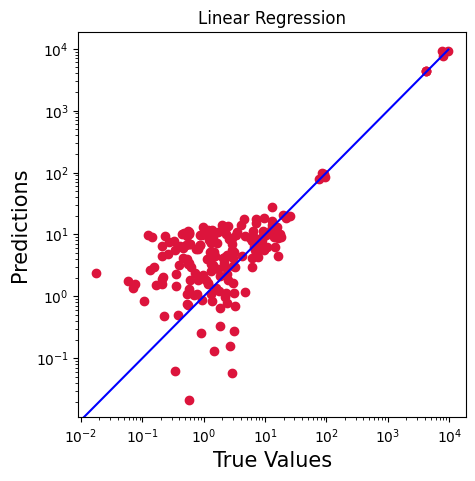

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(test_labels, lr_predict, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(lr_predict), max(test_labels))
p2 = min(min(lr_predict), min(test_labels))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis= ('equal')
plt.title("Linear Regression")
plt.show()

### **Random Forest**


#### **Training the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators = 200)
model_rf.fit(train_data,train_labels)

RandomForestRegressor(n_estimators=200)

#### **Applying the model to make predictions**

In [ ]:
rf_predict = model_rf.predict(test_data)
rf_predict

array([2.36963082e+00, 8.72985399e+03, 2.96176923e+00, 1.64779680e+01,
       1.34571131e-01, 6.58037315e+00, 6.12425776e-02, 2.98886067e+00,
       1.51035453e+00, 5.65915408e-01, 7.58128424e-01, 4.29531496e-01,
       7.44600019e-01, 3.14412944e+00, 6.37815911e-01, 7.61346017e-01,
       2.35236237e+00, 9.46525194e-01, 5.39205983e-01, 2.09765399e+00,
       1.48164984e+01, 1.05737209e+01, 7.42562606e-01, 6.54606902e-01,
       5.94758050e-01, 1.03109532e+01, 5.84810224e-01, 8.87813717e+01,
       3.35723898e-01, 1.25477956e+00, 2.72164105e+00, 3.42941297e-01,
       2.51525514e+00, 8.54225864e+00, 9.36558500e-01, 8.37191129e-01,
       5.48513993e-01, 7.84797222e-01, 5.73616701e-01, 7.94896777e-01,
       1.76972345e+00, 6.03764149e+00, 7.96543403e+00, 7.13807637e-01,
       4.29757846e+03, 2.74542090e-01, 7.14361683e-01, 2.45598356e-01,
       2.79394720e+00, 2.19485075e+00, 9.56711716e-01, 1.24047793e+00,
       1.88354456e+00, 2.40733910e-01, 1.45344032e+01, 1.56338353e+00,
      

#### **Evaluating model performance**


In [ ]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(test_labels,rf_predict)
print("R2 score : ",r1)

R2 score :  0.9919728927856462


In [ ]:
# Calculating Adj. R2 score:

Adjr2_1 = 1 - (1-r1)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.9900616767822286


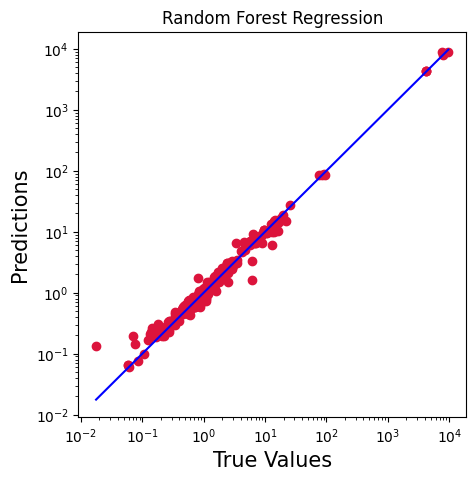

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(test_labels, rf_predict, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(rf_predict), max(test_labels))
p2 = min(min(rf_predict), min(test_labels))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis= ('equal')
plt.title("Random Forest Regression")
plt.show()

### **Support Vector Regression**

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data = sc.fit_transform(train_data)
test_data = sc.fit_transform(test_data)

In [ ]:
print(train_data)
print(test_data)

[[-0.61426562 -0.11238919 -0.46529582 ... -0.12637882 -0.18273889
  -0.12989954]
 [ 1.04594955 -0.11179452  0.52537628 ... -0.12637882 -0.18273889
  -0.12989954]
 [ 1.75577629 -0.11159433 -2.08718086 ... -0.12637882 -0.18273889
  -0.12989954]
 ...
 [-0.60572524 -0.11221096  1.59843828 ... -0.12637882 -0.18273889
  -0.12989954]
 [-0.60725444 -0.11238036  0.35793874 ... -0.12637882 -0.18273889
  -0.12989954]
 [-0.31784949 -0.11234706 -0.46529582 ... -0.12637882 -0.18273889
  -0.12989954]]
[[ 3.02409784 -0.12796781  0.19660795 ... -0.13315591 -0.19000285
  -0.11888766]
 [ 1.36251916  9.80970107  1.50082288 ... -0.13315591 -0.19000285
  -0.11888766]
 [-0.37155406 -0.13379305  0.89371019 ... -0.13315591 -0.19000285
  -0.11888766]
 ...
 [-0.54721127 -0.13436435  0.33792958 ... -0.13315591 -0.19000285
  -0.11888766]
 [-0.60198673 -0.13439076 -1.43271013 ... -0.13315591 -0.19000285
  -0.11888766]
 [-0.20760863 -0.13435976 -0.40923728 ... -0.13315591  5.26307895
  -0.11888766]]


#### **Training the model**

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(train_data,train_labels)

NameError: name 'train_data' is not defined

#### **Applying the model to make predictions**

In [ ]:
svr_predict = regressor.predict(test_data)
svr_predict

array([ 2.26432934e+00,  1.50352298e+01,  2.38212872e+00,  1.16381176e+01,
        2.25405396e+00,  5.97265346e+00,  5.80520585e-02,  2.18828977e+00,
        1.30434837e+00,  4.87149828e-01,  7.71086941e-01,  3.56922991e-01,
        1.74626747e+00,  2.59416571e+00,  2.07529390e-01,  1.13378444e+00,
        1.62947112e+00,  5.53272297e-01,  1.69268205e+00,  1.93439567e+00,
        1.16920407e+01,  6.85461942e+00,  7.14218208e-01,  4.36073577e-01,
        7.89942158e-01,  7.07452168e+00,  1.41593360e-01,  1.87745531e+01,
        3.92982263e-01,  1.22272470e+00,  2.00437269e+00,  1.74088362e-01,
        2.51579526e+00,  6.64886647e+00,  9.47905342e-01,  7.61243097e-01,
        3.58761703e-01,  7.98246677e-01,  2.37271529e-01,  6.96145326e-01,
        1.70352086e+00,  4.70472135e+00,  9.13593476e+00,  6.59528263e-01,
        1.20890566e+01,  1.26340641e-01,  1.13207601e+00,  3.02508959e-01,
        2.32440118e+00,  3.14337492e+00,  1.37153299e+00,  1.14470256e+00,
        1.71819357e+00,  

#### **Evaluating model performance**

In [ ]:
from sklearn.metrics import r2_score
r3 = r2_score(test_labels,svr_predict)
print("R2 score : ",r3)

R2 score :  -0.015797720071403454


In [ ]:
# Calculating Adj. R2 score:

Adjr2_2 = 1 - (1-r3)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : -0.2576543200884043


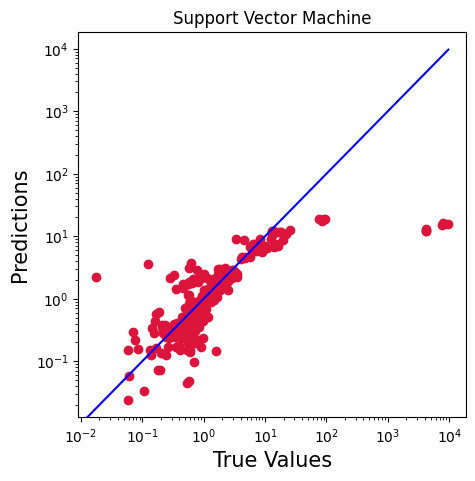

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(test_labels,svr_predict, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(svr_predict), max(test_labels))
p2 = min(min(svr_predict), min(test_labels))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis=('equal')
plt.title("Support Vector Machine")
plt.show()

### **Decision Tree**

#### **Training the model**

In [ ]:
# Training model Decision Tree
from sklearn.tree import DecisionTreeRegressor
dec_regressor = DecisionTreeRegressor(random_state = 5)
dec_regressor.fit(train_data,train_labels)

DecisionTreeRegressor(random_state=5)

#### **Applying the model**

In [ ]:
# Predicting results
decisiontree_predict = dec_regressor.predict(test_data)
decisiontree_predict

array([2.23350000e+00, 8.70641172e+03, 1.78666667e+00, 1.25066667e+01,
       1.09333333e-01, 5.51840000e+00, 1.00000000e-01, 1.78666667e+00,
       1.38538461e+00, 1.20384615e-01, 7.25263158e-01, 4.88750000e-01,
       1.20384615e-01, 1.78666667e+00, 1.20384615e-01, 1.14000000e-01,
       2.62650000e+00, 1.20384615e-01, 1.20384615e-01, 1.63000000e+00,
       1.37216667e+01, 1.11177778e+01, 1.20384615e-01, 1.20384615e-01,
       1.20384615e-01, 5.65095238e+00, 1.20384615e-01, 8.33068966e+01,
       1.20384615e-01, 1.33142857e+00, 2.62650000e+00, 1.20384615e-01,
       2.48083333e+00, 5.11409091e+00, 1.20384615e-01, 7.25263158e-01,
       1.20384615e-01, 5.90000000e-01, 5.90000000e-01, 7.25263158e-01,
       1.09333333e-01, 6.13357143e+00, 7.17821429e+00, 1.20384615e-01,
       4.69226111e+03, 1.20384615e-01, 1.20384615e-01, 1.30000000e-01,
       2.62650000e+00, 4.37500000e-01, 1.20384615e-01, 1.39523810e+00,
       1.93214286e+00, 1.26666667e-01, 1.37216667e+01, 1.75125000e+00,
      

#### **Evaluating model performance**

In [ ]:
from sklearn.metrics import r2_score
rdt = r2_score(test_labels,decisiontree_predict)
print("R2 score : ",rdt)

R2 score :  0.9630815700803875


In [ ]:
Adjr2_3 = 1 - (1-rdt)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_3))

Adj. R-Squared : 0.954291467718575


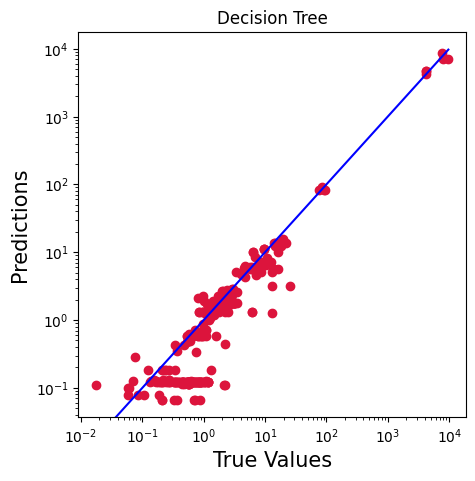

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(test_labels, decisiontree_predict, c='crimson' )
plt.yscale('log')
plt.xscale('log')



p1 = max(max(decisiontree_predict), max(test_labels))
p2 = min(min(decisiontree_predict), min(test_labels))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis=('equal')
plt.title("Decision Tree")
plt.show()

## **Cross Validation Random Forest**

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model_rf, X= train_data, y=train_labels, cv = 10)

In [ ]:
a1 = (accuracies.mean()*100)
b1 = (accuracies.std()*100)

In [ ]:
print("Accuracy : {:.2f}%".format( (a1)))
print("Standard Deviation : {:.2f}%".format(b1))

Accuracy : 98.95%
Standard Deviation : 1.04%


## **Cross Validation Decision tree**

In [ ]:
#Cross-validation Decicion Tree
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dec_regressor, X = train_data, y=train_labels,cv=10)

In [ ]:
a2 = (accuracies.mean()*100)
b2 = (accuracies.std()*100)

In [ ]:
print("Accuracy : {:.2f}%".format (a2))
print("Standard Deviation : {:.2f}%".format(b2))

Accuracy : 98.54%
Standard Deviation : 1.41%


## **Cross Validation SVR**

In [ ]:
#Cross-validation Support vector regression
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = train_data, y=train_labels,cv=10)

In [ ]:
a3 = (accuracies.mean()*100)
b3 = (accuracies.std()*100)

In [ ]:
print("Accuracy : {:.2f}%".format (a3))
print("Standard Deviation : {:.2f}%".format(b3))

Accuracy : 1.98%
Standard Deviation : 9.64%


## **Cross Validation Linear regression**

In [ ]:
#Cross-validation Support vector regression
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model_lr, X = train_data, y=train_labels,cv=10)

In [ ]:
a4 = (accuracies.mean()*100)
b4 = (accuracies.std()*100)

In [ ]:
print("Accuracy : {:.2f}%".format (a4))
print("Standard Deviation : {:.2f}%".format(b4))

Accuracy : 97.17%
Standard Deviation : 4.79%


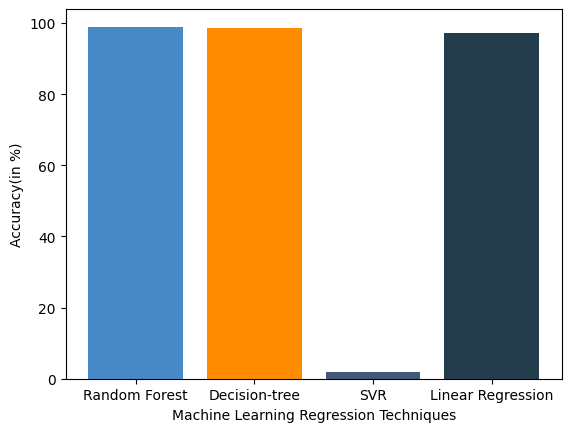

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree','SVR','Linear Regression']
Accuracy = [a1, a2,a3,a4]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00','#415a77','#233d4d'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()

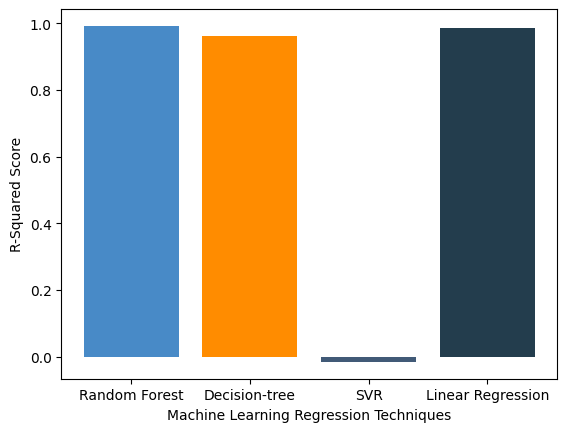

<Figure size 640x480 with 0 Axes>

In [ ]:
Accuracy = [r1, rdt,r3,r]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00','#415a77','#233d4d'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

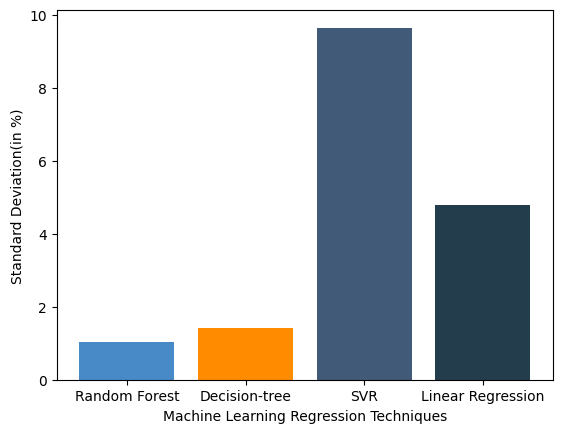

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree','SVR','Linear Regression']
Accuracy = [b1, b2,b3,b4]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00','#415a77','#233d4d'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')